# 1. 강의영상 

{{<video ???? >}}

# 2. Imports 

In [5]:
import pandas as pd 
import numpy as np
from plotnine import *

# 3. 예비학습

## A. `pd.concat()`

`# 예시1` -- 위아래로 

In [50]:
df1 = pd.DataFrame({'A':[1,2,3],'B':[2,3,4]})
df2 = pd.DataFrame({'A':[-1,-2,-3],'B':[-2,-3,-4]})

In [51]:
display("df1",df1)
display("df2",df2)

'df1'

,A,B
0,1,2
1,2,3
2,3,4


'df2'

,A,B
0,-1,-2
1,-2,-3
2,-3,-4


In [58]:
#pd.concat([df1,df2],axis=0) # (3,2) concat (3,2) -> (6,4) 
pd.concat([df1,df2])

,A,B
0,1,2
1,2,3
2,3,4
0,-1,-2
1,-2,-3
2,-3,-4


인덱스를 재정리하고 싶다면?

In [59]:
pd.concat([df1,df2]).reset_index(drop=True)

,A,B
0,1,2
1,2,3
2,3,4
3,-1,-2
4,-2,-3
5,-3,-4


`#`

`# 예시2` -- 좌우로

In [60]:
df1 = pd.DataFrame({'A':[1,2,3],'B':[2,3,4]})
df2 = pd.DataFrame({'C':[-1,-2,-3],'D':[-2,-3,-4]})

In [61]:
display("df1",df1)
display("df2",df2)

'df1'

,A,B
0,1,2
1,2,3
2,3,4


'df2'

,C,D
0,-1,-2
1,-2,-3
2,-3,-4


In [63]:
pd.concat([df1,df2],axis=1) # (3,2) concat (3,2) -> (3,4) 

,A,B,C,D
0,1,2,-1,-2
1,2,3,-2,-3
2,3,4,-3,-4


`#`

## B. `pd.merge()`

In [359]:
big = pd.DataFrame({'department':['A','A','B','B'], 'gender':['male','female','male','female'],'count':[1,2,3,1]})
small = pd.DataFrame({'department':['A','B'], 'total':[3,4]})

In [361]:
display("big",big)
display("small",small)

'big'

,department,gender,count
0,A,male,1
1,A,female,2
2,B,male,3
3,B,female,1


'small'

,department,total
0,A,3
1,B,4


In [362]:
big.merge(small)

,department,gender,count,total
0,A,male,1,3
1,A,female,2,3
2,B,male,3,4
3,B,female,1,4


In [363]:
small.merge(big)

,department,total,gender,count
0,A,3,male,1
1,A,3,female,2
2,B,4,male,3
3,B,4,female,1


## C. `.applymap()`

`# 예시1`

In [76]:
np.random.seed(43052)
df = pd.DataFrame({'A':np.random.rand(3), 'B':np.random.rand(3)})
df

,A,B
0,0.817682,0.619777
1,0.049532,0.122541
2,0.838686,0.117128


In [77]:
df.applymap(lambda x: 'Yes' if x>0.5 else 'No')

/tmp/ipykernel_288950/1665022133.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.


,A,B
0,Yes,Yes
1,No,No
2,Yes,No


`#`

## D. `df.astype()`

`-` 예시1

In [96]:
df = pd.DataFrame({'A':[0,1,2],'B':[4,5,6]})
df

,A,B
0,0,4
1,1,5
2,2,6


In [98]:
df.astype(float)

,A,B
0,0.0,4.0
1,1.0,5.0
2,2.0,6.0


## E. 제 아픈기억 

`# 예제1` -- object형은 일괄적으로 문자형임을 의미하는게 아님 

In [89]:
np.random.seed(43052)
df = pd.DataFrame({'A':['1','2','0','1',2], 'B':['2','3','0','0',0]})
df

,A,B
0,1,2
1,2,3
2,0,0
3,1,0
4,2,0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       5 non-null      object
 1   B       5 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


In [90]:
df.A[0],df.A[4],df.B[0],df.B[4]

('1', 2, '2', 0)

`#`

`# 예제2` -- column이름이 이상하게 들어가 있는 경우가 있음. 

In [332]:
df = pd.DataFrame({('A',''):[0,0,0], ('B',''):[1,1,1]})
df

,A,B
,,
0,0,1
1,0,1
2,0,1


In [333]:
df['A']

0    0
1    0
2    0
Name: A, dtype: int64

In [326]:
df[('A','')]

0    0
1    0
2    0
Name: (A, ), dtype: int64

`#`

# 4. 에너지사용량 시각화

아래는 2019년 서울의 에너지사용량을 불러오는 예시코드이다. 

In [26]:
pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2019.csv')

,지역,건물동수,연면적,에너지사용량(TOE)/전기,에너지사용량(TOE)/도시가스,에너지사용량(TOE)/지역난방
0,종로구,"17,851","9,204,140","63,492","76,653",799
1,중구,"10,383","10,078,848","79,223","68,210",497
2,용산구,"17,138","10,756,612","51,229","79,805","11,128"
3,성동구,"13,980","11,804,313","59,832","99,986",0
4,광진구,"21,556","12,272,738","68,756","123,447",0
5,동대문구,"21,794","12,664,554","65,913","111,420",0
6,중랑구,"23,950","15,182,802","59,370","109,284","7,442"
7,성북구,"27,112","15,938,807","77,007","148,376",0
8,강북구,"23,334","9,458,987","47,731","100,045",0
9,도봉구,"13,168","10,644,704","44,985","90,379","5,268"


에너지 사용량은 2018년부터 2021년까지의 기간 동안 서울, 부산 등 여러 지역에 대해 정리되어 있으며, 아래 주소 형식으로 저장되어 있다.

```
https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2018.csv
https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2019.csv
https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2020.csv
https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2021.csv
...
https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2018.csv
https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2019.csv
https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2020.csv
https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2021.csv
```

아래의 `url`, `prov`를 참고하여 모든 자료를 불러온 뒤 `pd.concat()`을 이용하여 하나의 df로 합쳐라. 

In [306]:
url = 'https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/{}.csv'

prov = ['Seoul', 'Busan', 'Daegu', 'Incheon', 
        'Gwangju', 'Daejeon', 'Ulsan', 'Sejongsi', 
        'Gyeonggi-do', 'Gangwon-do', 'Chungcheongbuk-do', 
        'Chungcheongnam-do', 'Jeollabuk-do', 'Jeollanam-do', 
        'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do']

올바르게 정리된 데이터프레임의 예시는 아래와 같다. 

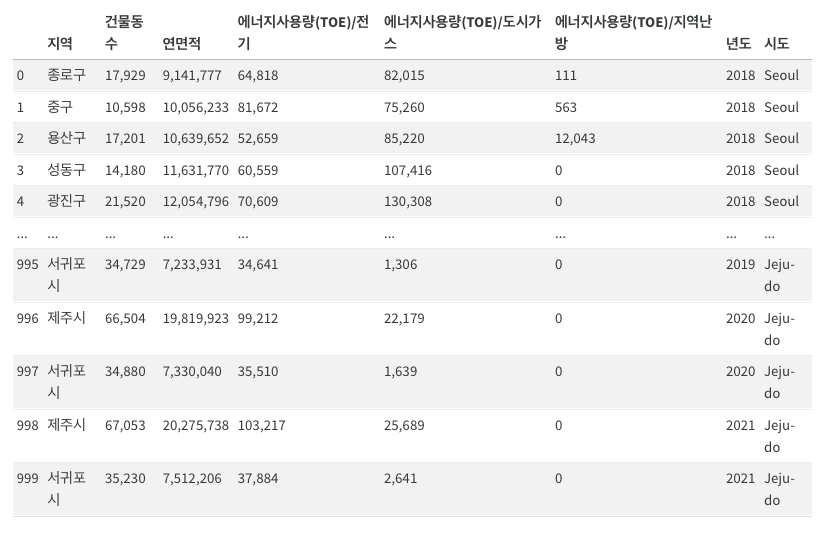

(풀이)

In [7]:
url.format(prov[0]+'2018')

'https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2018.csv'

In [ ]:
pd.read_csv(ur;

`(2)` 의미상 숫자형이지만 문자형으로 입력이된 자료를 모두 전처리하라. 

(풀이)

`(3)` 열의 이름을 아래와 같이 바꾸라. 

In [174]:
name_dict = {
    '년도': 'Year',
    '시도': 'Prov',
    '지역': 'Reg',
    '건물동수': 'BldgCount',
    '연면적': 'Area',
    '에너지사용량(TOE)/전기': 'Elec',
    '에너지사용량(TOE)/도시가스': 'Gas',
    '에너지사용량(TOE)/지역난방': 'Heat'
}

(풀이)

`(4)` 아래와 같은 그림을 시각화 하라. 

In [365]:
# 시각화예시

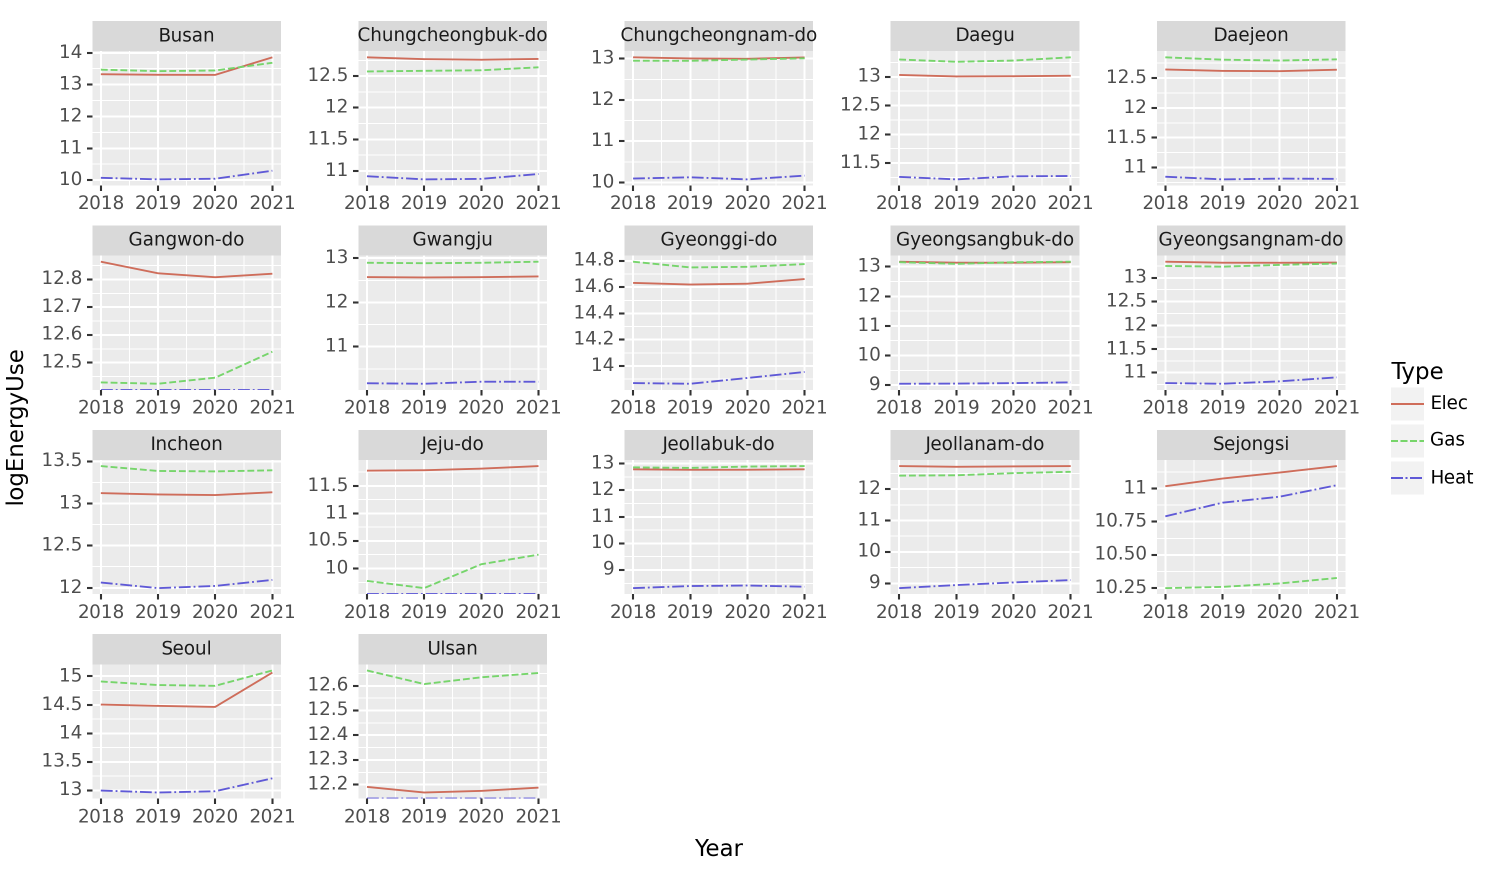

(풀이)

`(5)`  `Prov`별로 총 에너지사용량이 많은 상위5개의 `Reg`을 찾고 아래와 같이 시각화 하라.

In [366]:
# 시각화예시

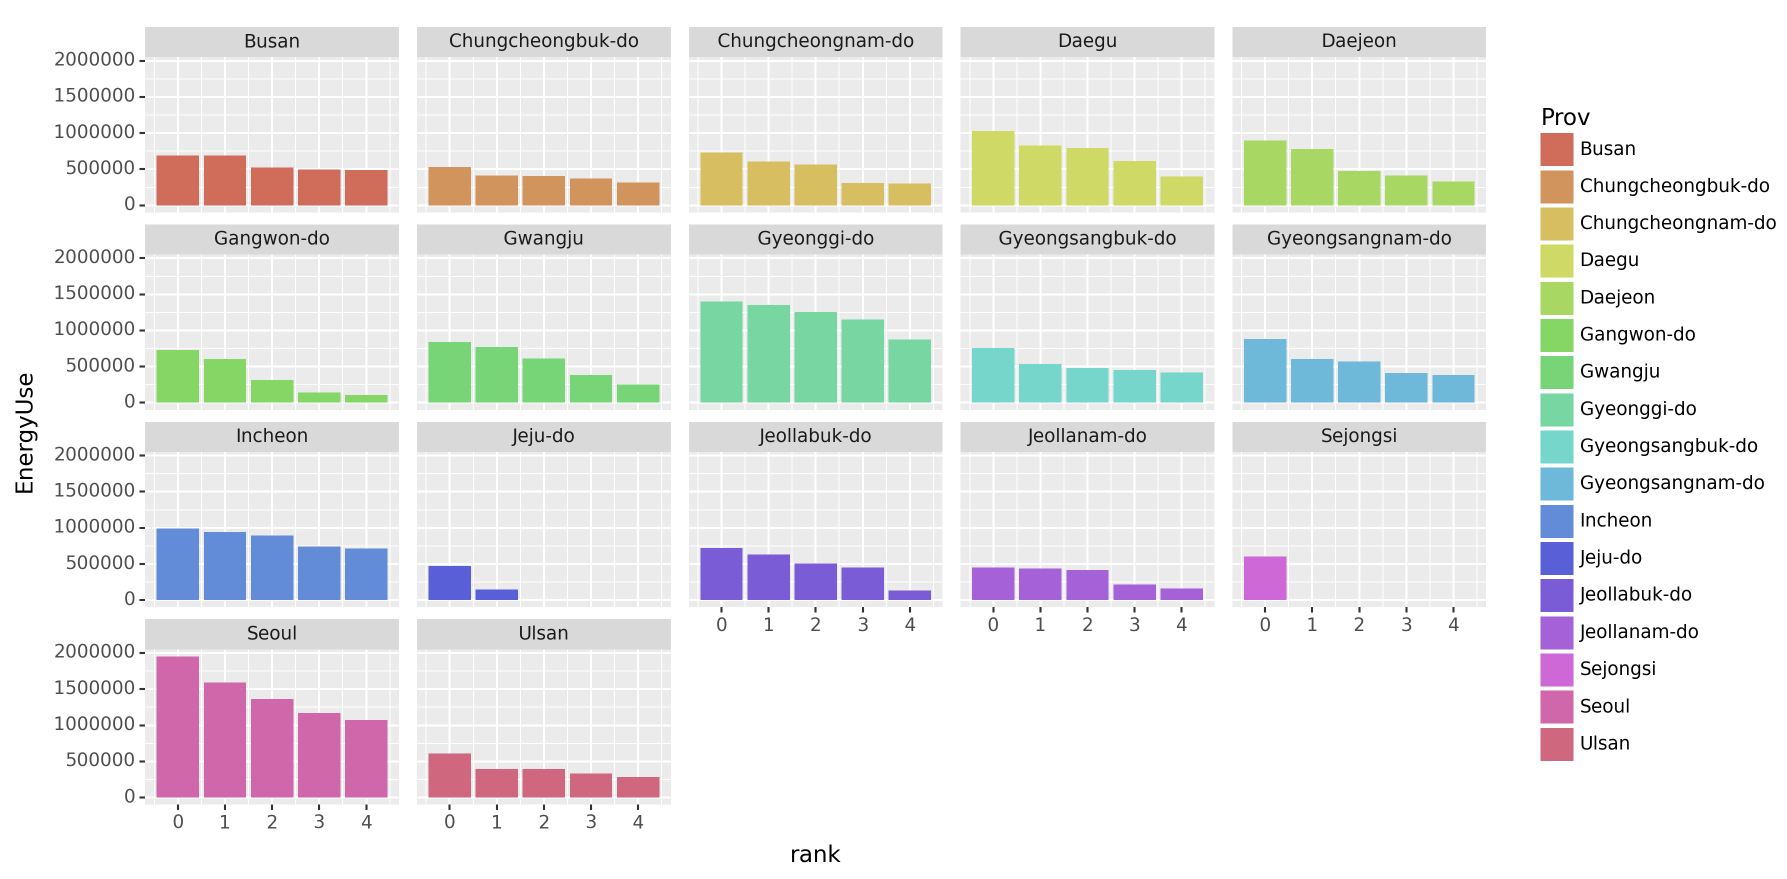

(풀이)

`(5)`  (`Prov`,`Year`)별 전기에너지 사용량 비율을 구하고 아래와 같이 시각화 하라. + 제주를 제외한 지역으로 한정하고 시각화하라. 

In [364]:
# 시각화예시

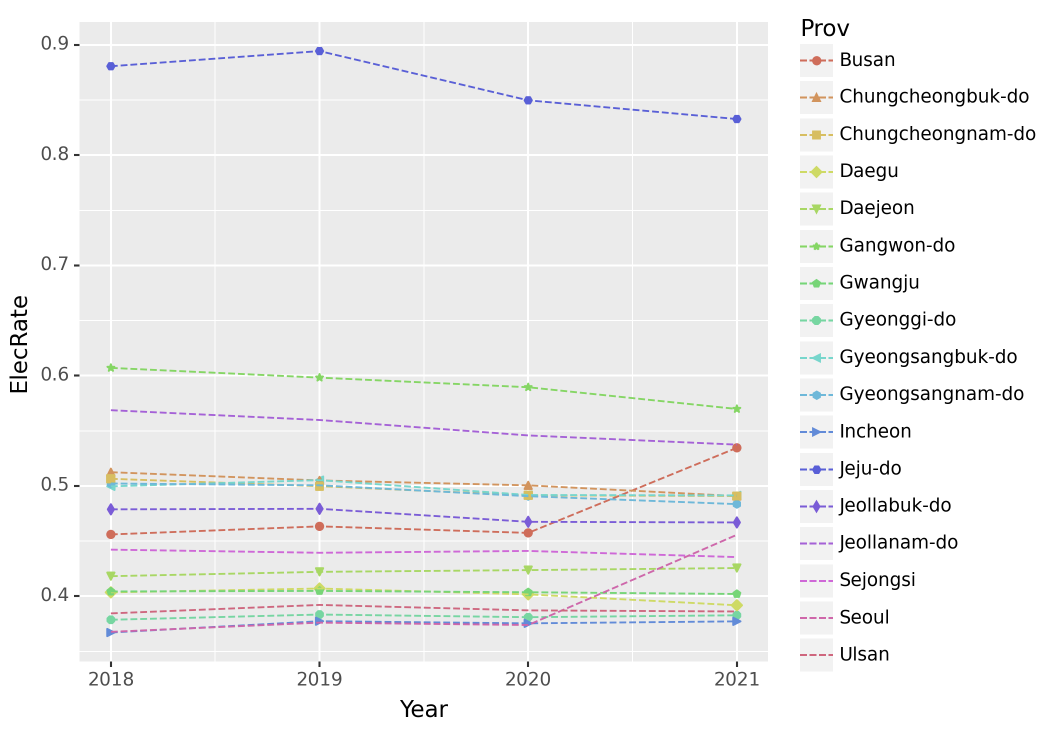

(풀이) 

# 5. `pd.merge()` 의 이용 

`before`에서 `after`로 가는 일반적인 방법이 있을까? 

In [3]:
url = 'https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/{}.csv'

prov = ['Seoul', 'Busan', 'Daegu', 'Incheon', 
        'Gwangju', 'Daejeon', 'Ulsan', 'Sejongsi', 
        'Gyeonggi-do', 'Gangwon-do', 'Chungcheongbuk-do', 
        'Chungcheongnam-do', 'Jeollabuk-do', 'Jeollanam-do', 
        'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do']

name_dict = {
    '년도': 'Year',
    '시도': 'Prov',
    '지역': 'Reg',
    '건물동수': 'BldgCount',
    '연면적': 'Area',
    '에너지사용량(TOE)/전기': 'Elec',
    '에너지사용량(TOE)/도시가스': 'Gas',
    '에너지사용량(TOE)/지역난방': 'Heat'
}

df = pd.concat([pd.read_csv(url.format(p+y)).assign(년도=y, 시도=p) for p in prov for y in ['2018', '2019', '2020', '2021']]).reset_index(drop=True)
df

,지역,건물동수,연면적,에너지사용량(TOE)/전기,에너지사용량(TOE)/도시가스,에너지사용량(TOE)/지역난방,년도,시도
0,종로구,"17,929","9,141,777","64,818","82,015",111,2018,Seoul
1,중구,"10,598","10,056,233","81,672","75,260",563,2018,Seoul
2,용산구,"17,201","10,639,652","52,659","85,220","12,043",2018,Seoul
3,성동구,"14,180","11,631,770","60,559","107,416",0,2018,Seoul
4,광진구,"21,520","12,054,796","70,609","130,308",0,2018,Seoul
...,...,...,...,...,...,...,...,...
995,서귀포시,"34,729","7,233,931","34,641","1,306",0,2019,Jeju-do
996,제주시,"66,504","19,819,923","99,212","22,179",0,2020,Jeju-do
997,서귀포시,"34,880","7,330,040","35,510","1,639",0,2020,Jeju-do
998,제주시,"67,053","20,275,738","103,217","25,689",0,2021,Jeju-do


In [4]:
before = df.assign(년도 = df.년도.astype(int))\
    .set_index(['년도','시도','지역']).applymap(lambda x: str(x).replace(',','')).astype(int).reset_index()\
    .rename(name_dict,axis=1)\
    .drop(['BldgCount','Area'],axis=1)
after = before\
    .melt(id_vars=['Year','Prov','Reg']).rename({'variable':'Type','value':'EnergyUse'},axis=1)\
    .pivot_table(index=['Year','Prov','Type'],values='EnergyUse',aggfunc='sum').reset_index()\
    .set_index(['Year','Prov','Type']).unstack()\
    .assign(ElecRate = lambda df: df[('EnergyUse','Elec')]/(df[('EnergyUse','Elec')]+df[('EnergyUse','Gas')]+df[('EnergyUse','Heat')]))\
    .iloc[:,-1].reset_index().set_axis(['Year','Prov','ElecRate'],axis=1)
display('before',before)
display('after',after)

/tmp/ipykernel_3461069/2643872.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .set_index(['년도','시도','지역']).applymap(lambda x: str(x).replace(',','')).astype(int).reset_index()\


'before'

,Year,Prov,Reg,Elec,Gas,Heat
0,2018,Seoul,종로구,64818,82015,111
1,2018,Seoul,중구,81672,75260,563
2,2018,Seoul,용산구,52659,85220,12043
3,2018,Seoul,성동구,60559,107416,0
4,2018,Seoul,광진구,70609,130308,0
...,...,...,...,...,...,...
995,2019,Jeju-do,서귀포시,34641,1306,0
996,2020,Jeju-do,제주시,99212,22179,0
997,2020,Jeju-do,서귀포시,35510,1639,0
998,2021,Jeju-do,제주시,103217,25689,0


'after'

,Year,Prov,ElecRate
0,2018,Busan,0.455996
1,2018,Chungcheongbuk-do,0.512447
2,2018,Chungcheongnam-do,0.506471
3,2018,Daegu,0.403464
4,2018,Daejeon,0.418136
...,...,...,...
63,2021,Jeollabuk-do,0.466878
64,2021,Jeollanam-do,0.537464
65,2021,Sejongsi,0.435457
66,2021,Seoul,0.455675


(해법) -- 머리가 안돌아가면 일단 tidydata로 만들고 시작..